![AIcrowd-Logo](https://images.aicrowd.com/raw_images/challenges/banner_file/751/c78e77cc88723e6fcf53.jpg)



<p align="center"> Join the communty! <br><a href="https://discord.gg/GTckBMx"><img src="https://img.shields.io/discord/657211973435392011?style=for-the-badge" alt="chat on Discord"></a>
</p>

<h1> <center>
🐀🐀🐀🐀🐀🐀🐀🐀🐀🐀🐀🐁🐁🐁🐁🐁🐁🐁🐁🐁🐁<br>
🐀 MABe Classical Classification: Starter kit 🐁<br>
🐀🐀🐀🐀🐀🐀🐀🐀🐀🐀🐀🐁🐁🐁🐁🐁🐁🐁🐁🐁🐁
</center>
</h1>

<p align="center"><img src="https://images.aicrowd.com/uploads/ckeditor/pictures/324/content_task1_structure.png">
</p>

# How to use this notebook 📝

1. **Copy the notebook**. This is a shared template and any edits you make here will not be saved. _You should copy it into your own drive folder._ For this, click the "File" menu (top-left), then "Save a Copy in Drive". You can edit your copy however you like.
2. **Link it to your AIcrowd account**. In order to submit your predictions to AIcrowd, you need to provide your account's API key.



# Setup AIcrowd Utilities 🛠

In [1]:
!pip install -U aicrowd-cli==0.1 > /dev/null 

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


# Import necessary modules and packages 📚


In [2]:
import pandas as pd
import numpy as np
import os

# Download the dataset 📲

Please get your API key from https://www.aicrowd.com/participants/me


In [3]:
API_KEY = "36b33b6e789168f73c953f01912d9a5a"
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


In [4]:
!aicrowd dataset download --challenge mabe-task-1-classical-classification

train.npy: 100%|█████████████████████████████| 118M/118M [00:17<00:00, 6.84MB/s]


Extract the downloaded dataset to `data` directory


In [5]:
!rm -rf data
!mkdir data
 
!mv train.npy data/train.npy
!mv test-release.npy data/test.npy
!mv sample-submission.npy data/sample_submission.npy

# Load Data
The dataset files are python dictionaries, [this](https://colab.research.google.com/drive/1ddCX-TAdEcsUaGf09f5Glgr_G57FMK_O#scrollTo=JPsfxdl2GMcM&line=18&uniqifier=1) is a descirption of how the data is organized.



In [6]:
train = np.load('data/train.npy',allow_pickle=True).item()
#test = np.load('data/test.npy',allow_pickle=True).item()
#sample_submission = np.load('data/sample_submission.npy',allow_pickle=True).item()

## Dataset Specifications 💾

-   **`train.npy`** - Training set for the task, which follows the following schema:

<p align="left" style="padding: 30px">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<img width="600px" src="https://i.imgur.com/GddvoT2.png">
</p>


-   **`test-release.npy`** - Test set for the task, which follows the following schema :

<p align="left" style="padding: 30px">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<img width="600px" src="https://i.imgur.com/vfa8Y4V.png">
</p>

-   **`sample_submission.npy`** - Template for a sample submission which follows the following schema

```json
{
    "<sequence_id-1>" : [0, 0, 1, 2, ...],
    "<sequence_id-2>" : [0, 1, 2, 0, ...]
}
```

Each key in the dictionary here refers to the unique sequence id obtained for the sequences in the test set.
The value for each of the keys is expected to hold a list of corresponing annotations. The annotations are represented by the index of the corresponding annotation words in the vocabular provided in the test set.

## How does the data look like? 🔍

### Data overview

In [7]:
print("Dataset keys - ", train.keys())
print("Vocabulary - ", train['vocabulary'])
print("Number of train Sequences - ", len(train['sequences']))


Dataset keys -  dict_keys(['vocabulary', 'sequences'])
Vocabulary -  {'attack': 0, 'investigation': 1, 'mount': 2, 'other': 3}
Number of train Sequences -  70


### Sample overview

In [8]:
sequence_names = list(train["sequences"].keys())
sequence_key = sequence_names[0]
single_sequence = train["sequences"][sequence_key]
print("Sequence name - ", sequence_key)
print("Single Sequence keys ", single_sequence.keys())
print(f"Number of Frames in {sequence_key} - ", len(single_sequence['annotations']))
print(f"Keypoints data shape of {sequence_key} - ", single_sequence['keypoints'].shape)
print(f"annotator_id of {sequence_key} - ", single_sequence['annotator_id'])

Sequence name -  1cac195d39
Single Sequence keys  dict_keys(['keypoints', 'annotator_id', 'annotations'])
Number of Frames in 1cac195d39 -  4879
Keypoints data shape of 1cac195d39 -  (4879, 2, 2, 7)
annotator_id of 1cac195d39 -  0


# Helper function for visualization 💁
Don't forget to run the cell 😉

In [10]:
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import colors
from matplotlib import rc
 
rc('animation', html='jshtml')
 
# Note: Image processing may be slow if too many frames are animated.                
 
#Plotting constants
FRAME_WIDTH_TOP = 1024
FRAME_HEIGHT_TOP = 570
 
RESIDENT_COLOR = 'lawngreen'
INTRUDER_COLOR = 'skyblue'
 
PLOT_MOUSE_START_END = [(0, 1), (0, 2), (1, 3), (2, 3), (3, 4),
                        (3, 5), (4, 6), (5, 6), (1, 2)]
 
class_to_color = {'other': 'white', 'attack' : 'red', 'mount' : 'green',
                  'investigation': 'orange'}
 
class_to_number = {s: i for i, s in enumerate(train['vocabulary'])}
 
number_to_class = {i: s for i, s in enumerate(train['vocabulary'])}
 
def num_to_text(anno_list):
  return np.vectorize(number_to_class.get)(anno_list)
 
def set_figax():
    fig = plt.figure(figsize=(6, 4))
 
    img = np.zeros((FRAME_HEIGHT_TOP, FRAME_WIDTH_TOP, 3))
 
    ax = fig.add_subplot(111)
    ax.imshow(img)
 
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
    return fig, ax
 
def plot_mouse(ax, pose, color):
    # Draw each keypoint
    for j in range(7):
        ax.plot(pose[j, 0], pose[j, 1], 'o', color=color, markersize=5)
 
    # Draw a line for each point pair to form the shape of the mouse
 
    for pair in PLOT_MOUSE_START_END:
        line_to_plot = pose[pair, :]
        ax.plot(line_to_plot[:, 0], line_to_plot[
                :, 1], color=color, linewidth=1)
 
def animate_pose_sequence(video_name, keypoint_sequence, start_frame = 0, stop_frame = 100, 
                          annotation_sequence = None):
    # Returns the animation of the keypoint sequence between start frame
    # and stop frame. Optionally can display annotations.
    seq = keypoint_sequence.transpose((0,1,3,2))
 
    image_list = []
    
    counter = 0
    for j in range(start_frame, stop_frame):
        if counter%20 == 0:
          print("Processing frame ", j)
        fig, ax = set_figax()
        plot_mouse(ax, seq[j, 0, :, :], color=RESIDENT_COLOR)
        plot_mouse(ax, seq[j, 1, :, :], color=INTRUDER_COLOR)
        
        if annotation_sequence is not None:
          annot = annotation_sequence[j]
          annot = number_to_class[annot]
          plt.text(50, -20, annot, fontsize = 16, 
                   bbox=dict(facecolor=class_to_color[annot], alpha=0.5))
 
        ax.set_title(
            video_name + '\n frame {:03d}.png'.format(j))
 
        ax.axis('off')
        fig.tight_layout(pad=0)
        ax.margins(0)
 
        fig.canvas.draw()
        image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(),
                                        dtype=np.uint8)
        image_from_plot = image_from_plot.reshape(
            fig.canvas.get_width_height()[::-1] + (3,)) 
 
        image_list.append(image_from_plot)
 
        plt.close()
        counter = counter + 1
 
    # Plot animation.
    fig = plt.figure()
    plt.axis('off')
    im = plt.imshow(image_list[0])
 
    def animate(k):
        im.set_array(image_list[k])
        return im,
    ani = animation.FuncAnimation(fig, animate, frames=len(image_list), blit=True)
    return ani
 
def plot_annotation_strip(annotation_sequence, start_frame = 0, stop_frame = 100, title="Behavior Labels"):
  # Plot annotations as a annotation strip.
 
  # Map annotations to a number.
  annotation_num = []
  for item in annotation_sequence[start_frame:stop_frame]:
    annotation_num.append(class_to_number[item])
 
  all_classes = list(set(annotation_sequence[start_frame:stop_frame]))
 
  cmap = colors.ListedColormap(['red', 'orange', 'green', 'white'])
  bounds=[-0.5,0.5,1.5, 2.5, 3.5]
  norm = colors.BoundaryNorm(bounds, cmap.N)
 
  height = 200
  arr_to_plot = np.repeat(np.array(annotation_num)[:,np.newaxis].transpose(),
                                                  height, axis = 0)
  
  fig, ax = plt.subplots(figsize = (16, 3))
  ax.imshow(arr_to_plot, interpolation = 'none',cmap=cmap, norm=norm)
 
  ax.set_yticks([])
  ax.set_xlabel('Frame Number')
  plt.title(title)
 
  import matplotlib.patches as mpatches
 
  legend_patches = []
  for item in all_classes:
    legend_patches.append(mpatches.Patch(color=class_to_color[item], label=item))
 
  plt.legend(handles=legend_patches,loc='center left', bbox_to_anchor=(1, 0.5))
 
  plt.tight_layout()

# Visualize the mouse movements🎥

Sample visualization for plotting pose gifs.

Processing frame  3000
Processing frame  3020
Processing frame  3040
Processing frame  3060
Processing frame  3080


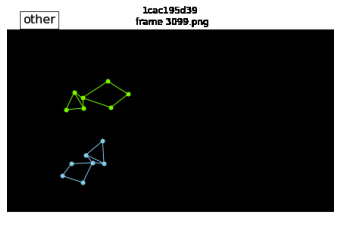

In [12]:
keypoint_sequence = single_sequence['keypoints']
annotation_sequence = single_sequence['annotations']

ani = animate_pose_sequence(sequence_key,
                            keypoint_sequence, 
                            start_frame = 3000,
                            stop_frame = 3100,
                            annotation_sequence = annotation_sequence)

# Display the animaion on colab
ani

### Showing a section of the validation data (Index needs to be selected for a full video)

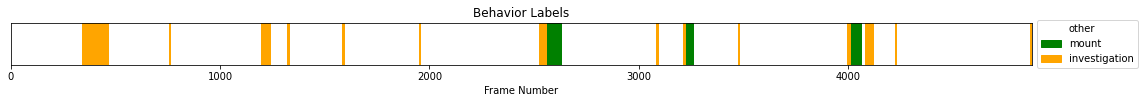

In [13]:
annotation_sequence = single_sequence['annotations']
text_sequence = num_to_text(annotation_sequence)
 
plot_annotation_strip(
    text_sequence,
    start_frame=0,
    stop_frame=len(annotation_sequence) + 1000
)

# Basic EDA 🤓
Each sequence has different amounts of each behavior, here we get the percentage of frames of each behavior in each sequence. We can use this to split the dataset for validation in a stratified way.

In [14]:
vocabulary = train['vocabulary']
def get_percentage(sequence_key):
  anno_seq = num_to_text(train['sequences'][sequence_key]['annotations'])
  counts = {k: np.mean(np.array(anno_seq) == k) for k in vocabulary}
  return counts

anno_percentages = {k: get_percentage(k) for k in train['sequences']}

anno_perc_df = pd.DataFrame(anno_percentages).T
print("Percentage of frames in every sequence for every class")
anno_perc_df.head()

Percentage of frames in every sequence for every class


,attack,investigation,mount,other
1cac195d39,0.000000,0.077885,0.033818,0.888297
b40d39ca72,0.000000,0.625136,0.000000,0.374864
f45694e6b9,0.000000,0.375125,0.000000,0.624875
9212f26324,0.015467,0.112307,0.000000,0.872226
5490af36aa,0.438260,0.285662,0.010321,0.265757


## Percentage Frames of all behaviors
Lets look at the class imbalance

# 

In [15]:
all_annotations = []
for sk in train['sequences']:
  anno = train['sequences'][sk]['annotations']
  all_annotations.extend(list(anno))
all_annotations = num_to_text(all_annotations)
classes, counts = np.unique(all_annotations, return_counts=True)
pd.DataFrame({"Behavior": classes,
              "Percentage Frames": counts/len(all_annotations)})

,Behavior,Percentage Frames
0,attack,0.027658
1,investigation,0.288777
2,mount,0.056372
3,other,0.627194


In [16]:
from scipy.spatial.distance import cdist
import numpy as np

body_parts = 7
fps = 30


def extract_features(data):
    data_dict = {}
    sequence_train_names = list(data["sequences"].keys())
    for sequence_key in sequence_train_names :
        single_sequence = data["sequences"][sequence_key]

        # features Dimensions: (# frames) x (mouse ID) x (x, y coordinate) x (body part)
        keypoints = single_sequence["keypoints"]
        n_frames = keypoints.shape[0]

        for frame in range(n_frames):
            mouse1_xy = keypoints[frame][0].T
            mouse2_xy = keypoints[frame][1].T

            if (frame < n_frames-1):
                mouse1_xy_fl = keypoints[frame + 1][0].T
                mouse2_xy_fl = keypoints[frame + 1][1].T

            if(frame==0) :
                feature_f = np.hstack([mouse1_xy.flatten(),mouse2_xy.flatten()])
            else :
                feat_new = np.hstack([mouse1_xy.flatten(),mouse2_xy.flatten()])
                feature_f = np.vstack([feature_f,feat_new])

        data_dict[sequence_key]= feature_f

    return data_dict


In [41]:
data = extract_features(train)

In [35]:
pd.DataFrame(data.get('1cac195d39'))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,298.993678,140.750941,266.993678,194.750941,248.993678,138.750941,243.993678,169.750941,181.993678,240.750941,...,167.689427,329.872987,200.689427,342.872987,235.689427,429.872987,161.689427,433.872987,203.689427,487.872987
1,295.167458,139.060320,272.167458,185.060320,258.167458,133.060320,250.167458,163.060320,188.167458,231.060320,...,164.571692,326.832877,197.571692,340.832877,233.571692,429.832877,159.571692,433.832877,202.571692,488.832877
2,301.360918,135.643521,278.360918,178.643521,264.360918,130.643521,256.360918,157.643521,203.360918,221.643521,...,165.119408,325.252561,198.119408,340.252561,231.119408,429.252561,159.119408,434.252561,203.119408,488.252561
3,301.279237,134.841073,283.279237,170.841073,269.279237,125.841073,261.279237,151.841073,214.279237,212.841073,...,164.141740,323.633701,197.141740,338.633701,230.141740,431.633701,156.141740,433.633701,202.141740,487.633701
4,314.116591,126.012383,292.116591,164.012383,277.116591,123.012383,272.116591,147.012383,221.116591,212.012383,...,169.022800,319.935361,201.022800,338.935361,234.022800,429.935361,157.022800,430.935361,201.022800,485.935361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4874,249.866255,241.709793,263.866255,183.709793,305.866255,225.709793,295.866255,195.709793,351.866255,137.709793,...,121.517000,219.339301,125.517000,259.339301,135.517000,320.339301,77.517000,290.339301,101.517000,337.339301
4875,262.801506,263.084053,265.801506,208.084053,319.801506,238.084053,297.801506,213.084053,327.801506,143.084053,...,120.388774,219.682083,124.388774,259.682083,135.388774,319.682083,79.388774,290.682083,103.388774,337.682083
4876,265.164439,290.183461,264.164439,233.183461,319.164439,254.183461,295.164439,233.183461,319.164439,153.183461,...,119.131664,220.485780,121.131664,261.485780,134.131664,320.485780,78.131664,289.485780,102.131664,338.485780
4877,254.539417,313.828905,256.539417,251.828905,307.539417,278.828905,289.539417,252.828905,312.539417,164.828905,...,115.975401,221.115089,118.975401,261.115089,135.975401,319.115089,78.975401,295.115089,101.975401,338.115089


# Interpolation

In [36]:
def interpolate_frame(data,train,n):
    sequence_train_names = list(data.keys())
    for sequence_key in sequence_train_names :
        single_sequence = pd.DataFrame(data[sequence_key])
        single_sequence['annotations'] = train["sequences"][sequence_key]['annotations']

    
        new_index = pd.RangeIndex(len(single_sequence)*(n+1))
        single_sequence_ext = pd.DataFrame(np.nan, index=new_index, columns=single_sequence.columns)
        ids = np.arange(len(single_sequence))*(n+1)
        single_sequence_ext.loc[ids] = single_sequence.values
        single_sequence_ext.drop(single_sequence_ext.index[-n:], inplace=True)
        single_sequence_ext['annotations'].interpolate('backfill',inplace=True)
        single_sequence_ext.interpolate('quadratic',inplace=True)

    
        data[sequence_key] = single_sequence_ext.to_numpy()
    return data

In [39]:
data_ext = interpolate_frame(data,train,2)

ValueError: Length of values (4879) does not match length of index (14635)

In [40]:
t = pd.DataFrame(data_ext.get('1cac195d39'))

In [31]:
# checking at the indices where the mouse does an action different than 'other'
t[28][t[28] != 3.0]

1015     1.0
1016     1.0
1017     1.0
1018     1.0
1019     1.0
        ... 
14618    1.0
14619    1.0
14620    1.0
14621    1.0
14622    1.0
Name: 28, Length: 1635, dtype: float64

In [32]:
t.loc[1011:1020]

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
1011,474.855444,477.762297,540.855444,444.762297,534.855444,504.762297,555.855444,475.762297,631.855444,433.762297,...,535.271852,379.328928,501.271852,380.328928,436.271852,458.328928,464.271852,416.328928,409.271852,3.0
1012,474.446123,478.017425,538.450839,442.628270,533.760582,505.117543,554.225420,475.760008,631.333458,433.335133,...,534.314089,373.930090,500.983265,379.088833,437.353274,455.123385,466.285333,415.764271,409.080298,3.0
1013,475.042751,478.882308,535.804815,439.679918,533.300455,505.390835,552.319156,475.969867,630.630595,432.993867,...,532.816481,368.683452,500.370384,378.136407,438.262825,451.820310,467.560256,415.186541,408.680882,3.0
1014,474.809845,480.231675,533.809845,437.231675,532.809845,505.231675,550.809845,475.231675,629.809845,432.231675,...,531.553943,362.962158,499.553943,376.962158,438.553943,447.962158,469.553943,415.962158,408.553943,3.0
1015,473.441491,482.044647,532.614674,435.502611,532.177884,504.581647,549.809684,473.352064,628.881705,430.964087,...,530.655626,356.661732,498.554064,375.481173,438.152202,443.472670,472.509282,418.318858,408.779539,1.0
1016,471.089948,484.220062,532.002083,434.598163,531.424444,503.589857,549.133335,470.662407,627.842342,429.328682,...,530.089174,349.597173,497.443686,373.700061,437.212079,438.469490,476.243553,421.799194,409.510125,1.0
1017,468.668762,486.150935,530.668762,435.150935,530.668762,503.150935,547.668762,469.150935,626.668762,428.150935,...,529.660446,340.658478,496.660446,371.658478,436.660446,433.658478,479.660446,423.658478,411.660446,1.0
1018,466.330193,487.736103,528.397493,437.266362,529.930712,503.413985,545.230626,469.149020,625.357132,427.568425,...,529.337086,329.660644,496.277282,369.363034,436.651781,429.157276,482.577242,423.439263,415.382957,1.0
1019,464.092761,489.014940,525.302329,440.504280,529.161414,504.287640,542.000474,470.384422,623.879437,427.473883,...,529.109260,317.042332,496.206060,366.749832,437.147709,424.560462,485.216989,421.327122,420.274705,1.0
1020,462.067599,490.223692,522.067599,442.223692,528.067599,505.223692,539.067599,471.223692,622.067599,427.223692,...,528.917969,305.435492,495.917969,363.435492,437.917969,417.435492,488.917969,418.435492,423.917969,1.0


# Bounding boxes 

In [33]:
def bounding_box(data):
    data_dict = {}
    sequence_train_names = list(data["sequences"].keys())
    for sequence_key in sequence_train_names :
        single_sequence = data["sequences"][sequence_key]

        # features Dimensions: (# frames) x (mouse ID) x (x, y coordinate) x (body part)
        keypoints = single_sequence["keypoints"]
        n_frames = keypoints.shape[0]
        print(n_frames)
        for frame in range(n_frames):
            mouse1_x = keypoints[frame][0][0]
            mouse1_y = keypoints[frame][0][1]
            mouse2_x = keypoints[frame][1][0]
            mouse2_y = keypoints[frame][1][1]
            
            #computing bounding boxes, their axis should be aligned with the screen, otherwise it is not 
            #trivial to compute the intersection area 
            box_up_left_1 = [min(mouse1_x),min(mouse1_y)]
            box_up_right_1 = [max(mouse1_x),min(mouse1_y)]
            box_down_left_1= [min(mouse1_x),max(mouse1_y)]
            box_down_right_1= [max(mouse1_x),max(mouse1_y)]
                             
            box_up_left_2 = [min(mouse2_x),min(mouse2_y)]
            box_up_right_2 = [max(mouse2_x),min(mouse2_y)]
            box_down_left_2 = [min(mouse2_x),max(mouse2_y)]
            box_down_right_2 = [max(mouse2_x),max(mouse2_y)]
            
          
                             
            # compute intersection of bounding boxes 
            x_left = max(box_up_left_1[0], box_up_left_1[0])
            y_top = max(box_up_left_1[1], box_up_left_1[1])
            x_right = min(box_down_left_1[0], box_down_left_2[0])
            y_bottom = min(box_down_left_1[1], box_down_left_2[1])
            
            #add if statement to return 0 in case there is no intersection 
            if(box_down_left_1[0]>box_up_left[0] or box_down_left_1[0]<box_up_left[0]):
                return 0 
            
            intersection_area = (x_right - x_left) * (y_bottom - y_top)  
            
            return intersection_area





SyntaxError: invalid syntax (713456109.py, line 20)

# Center of mass and mouse extension

In [63]:
def center_of_mass(data):
    sequence_train_names = data.keys()
    i=0
    for sequence_key in sequence_train_names:
        single_sequence = data[sequence_key]
        # keypoints = single_sequence["keypoints"]
        n_frames = single_sequence.shape[0]
        print("Processing sequence ", i ,"/", len(sequence_train_names), end="\r")
        i+=1
        for frame in range(n_frames):
            mouse1_x = single_sequence[frame][0:7]
            mouse1_y = single_sequence[frame][7:14]
            mouse2_x = single_sequence[frame][14:21]
            mouse2_y = single_sequence[frame][21:28]
            mouse1_center = [np.average(mouse1_x), np.average(mouse1_y)]
            mouse2_center = [np.average(mouse2_x), np.average(mouse2_y)]
            mouse1_dispersion = np.average(np.sqrt(np.square(mouse1_x - mouse1_center[0]) + np.square(mouse1_y - mouse1_center[1])))
            mouse2_dispersion = np.average(np.sqrt(np.square(mouse2_x - mouse2_center[0]) + np.square(mouse2_y - mouse2_center[1])))
            distance_between_centers = np.sqrt(np.sum(np.square(np.array(mouse1_center) - np.array(mouse2_center))))


In [64]:
center_of_mass(data)

0Processing sequence  62 / 70Processing sequence  64 / 70Processing sequence  66 / 70Processing sequence  68 / 70